In [1]:
!pip install mrmr_selection

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import seaborn as sb
from mrmr import mrmr_classif
from imblearn.under_sampling import RandomUnderSampler
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


100%|██████████| 4/4 [00:00<00:00, 39.42it/s]


     ca  sex  slope  cp
0     0    1      2   3
1     0    1      1   2
2     0    0      1   3
3     0    1      1   3
4     0    1      1   2
..   ..  ...    ...  ..
161   0    1      2   4
162   0    0      2   4
163   1    1      2   4
164   2    1      1   4
165   3    0      2   4

[166 rows x 4 columns]
Accuracy: 0.9411764705882353


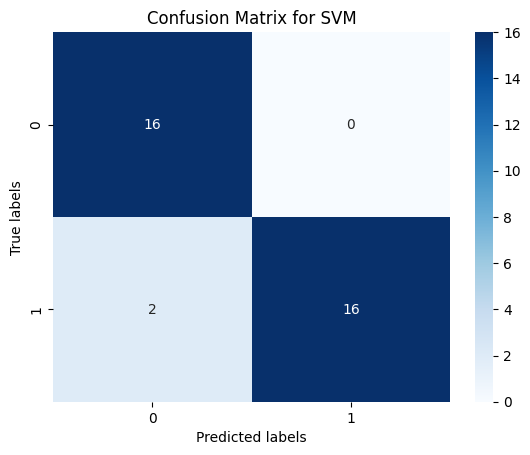

In [13]:
data = pd.read_csv('/content/drive/MyDrive/MachinLearning/heart.csv')
data = pd.DataFrame(data)  # Convert NumPy array to Pandas DataFrame

x = data[data.columns[:-1]]
y = data[data.columns[-1]]

# Sampling data to avoid imbalance between classes
sampler = RandomUnderSampler(sampling_strategy='majority')
x, y = sampler.fit_resample(x, y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# Scaling training and test datasets
scaler = StandardScaler()
scaler.fit(x_train)

x_train = pd.DataFrame(x_train, columns = x.columns)
x_test = pd.DataFrame(x_test, columns=x.columns)

selected_features = mrmr_classif(X=x_train, y=y_train, K=4)

x = x[selected_features]
print(x)

svm_b = SVC(kernel='linear', random_state=42, probability=True)
svm_b.fit(x_train, y_train)
y_pred = svm_b.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_test, y_pred)

# Heatmap of the confusion matrix using Seaborn
sb.heatmap(cm, annot=True, cmap="Blues", fmt='d')

# Add axis labels and a title
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for SVM")

# Show the plot
plt.show()